In [1]:
import pandas
import numpy
import pmdarima as pm
import matplotlib.pyplot as plt
from TimeSeriesModelCreator_Parallel_talos import TimeSeriesModelCreator_Parallel_talos

Using TensorFlow backend.


In [2]:
label_size = 20

# Read in dataset and prepare training and testing sets

In [5]:
dataframe = pandas.read_csv(r'..\Datasets\GEANTCombined\all_in_one_complete_appended.csv')
subsets_training = []
subsets_testing = []
for x in range(1,6):
    subsets_training.append(dataframe[(dataframe.source == x) & (dataframe.destination == 11)][['bandwidth']][-(1000+200):-200])
    subsets_testing.append(dataframe[(dataframe.source == x) & (dataframe.destination == 11)][['bandwidth']][-200:])

# Creating LSTM and training

In [6]:
creator = TimeSeriesModelCreator_Parallel_talos(1, r'..\Datasets\GEANTCombined\all_in_one_complete_appended.csv')
modelMatch = {}
for x in range(1,6):
    creator.add_new_model(name = 'test'+str(x), nodes = 32, layer = 3, loss='mean_squared_error', optimizer='adam', rangeValue = 10)
    modelMatch[str(x)+'_11'] = 'test'+str(x)
creator.train_model(1, 5, 11, 11, 1000, 200, modelMatch, 8, 1, 0, 10)

W1119 15:06:42.064210  9316 deprecation_wrapper.py:119] From c:\program files\python36\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1119 15:06:42.076177  9316 deprecation_wrapper.py:119] From c:\program files\python36\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1119 15:06:42.079170  9316 deprecation_wrapper.py:119] From c:\program files\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1119 15:06:42.475140  9316 deprecation_wrapper.py:119] From c:\program files\python36\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Source: 1 / Destination: 11
(989, 1, 1)


W1119 15:06:44.671509  9316 deprecation.py:323] From c:\program files\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1119 15:06:45.878545  9316 deprecation_wrapper.py:119] From c:\program files\python36\lib\site-packages\keras\backend\tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W1119 15:06:45.980865  9316 deprecation_wrapper.py:119] From c:\program files\python36\lib\site-packages\keras\backend\tensorflow_backend.py:1020: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 791 samples, validate on 198 samples
Epoch 1/8
791/791 [==============================] - 5s 6ms/step - loss: 0.0278 - val_loss: 0.0286
Epoch 2/8
791/791 [==============================] - 3s 4ms/step - loss: 0.0243 - val_loss: 0.0279
Epoch 3/8
791/791 [==============================] - 2s 3ms/step - loss: 0.0240 - val_loss: 0.0247
Epoch 4/8
791/791 [==============================] - 2s 3ms/step - loss: 0.0238 - val_loss: 0.0240
Epoch 5/8
791/791 [==============================] - 2s 3ms/step - loss: 0.0236 - val_loss: 0.0223
Epoch 6/8
791/791 [==============================] - 2s 3ms/step - loss: 0.0233 - val_loss: 0.0228
Epoch 7/8
791/791 [==============================] - 2s 3ms/step - loss: 0.0231 - val_loss: 0.0233
Epoch 8/8
791/791 [==============================] - 2s 3ms/step - loss: 0.0232 - val_loss: 0.0258
Source: 2 / Destination: 11
(989, 1, 1)
Train on 791 samples, validate on 198 samples
Epoch 1/8
791/791 [==============================] - 4s 5ms/step - loss: 0.0

# LSTM predictions

In [7]:
LSTMpredictions = []
for x in range(1,6):
    #prediction = creator.predict('test'+str(x), subsets_testing[x-1].iloc[::4], 0)
    prediction = creator.predict('test'+str(x), subsets_testing[x-1], 0)
    LSTMpredictions.append(prediction)
    #print(prediction)

In [8]:
frame = pandas.DataFrame(LSTMpredictions[0])
print(frame)

               0            1            2            3            4  \
0    1029.919556  1220.899780  1137.137939  1012.468079  1213.892822   
1    1014.208679  1204.883057  1123.270020   999.507935  1200.407959   
2     432.400696   607.197144   614.253113   512.584045   696.094238   
3     858.022156  1045.256958   985.801575   870.071289  1065.948853   
4    1076.152710  1267.988525  1177.992432  1050.539673  1253.530640   
5    1117.880615  1310.428467  1214.925781  1084.812500  1289.247925   
6    1163.772095  1357.034058  1255.611816  1122.403931  1328.463989   
7    1118.502441  1311.059814  1215.475952  1085.322021  1289.779419   
8    1106.498169  1298.857422  1204.845215  1075.472046  1279.510620   
9    1138.991089  1331.876221  1233.632324  1102.118042  1307.296143   
10   1793.945068  1987.777344  1823.567505  1625.250732  1858.873779   
11   2078.952881  2265.064697  2088.576172  1841.148804  2092.188232   
12   2142.820312  2326.214355  2148.992920  1888.078613  2143.67

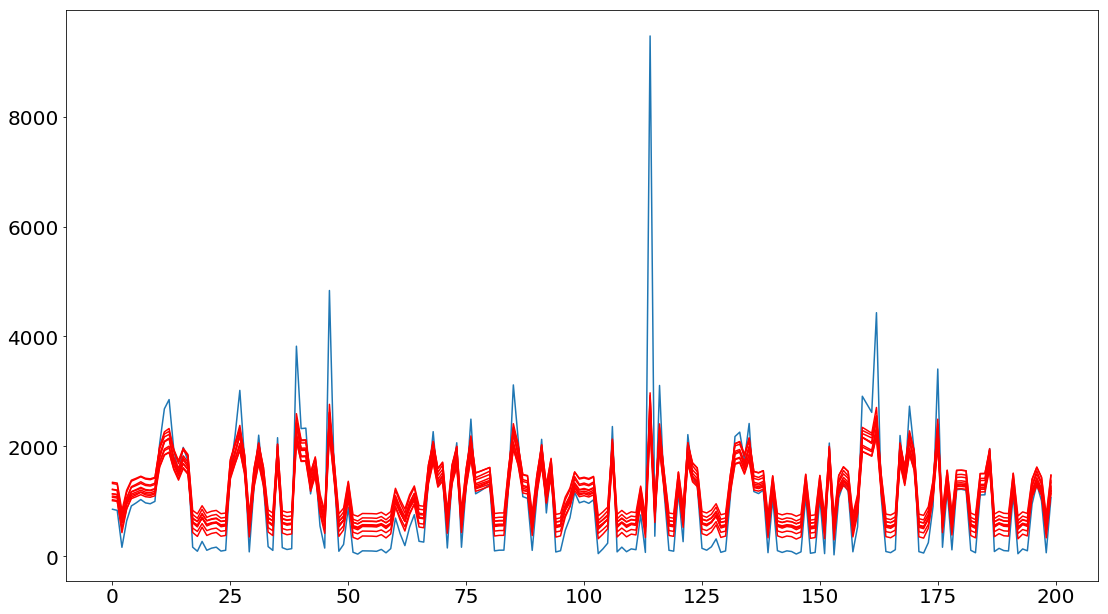

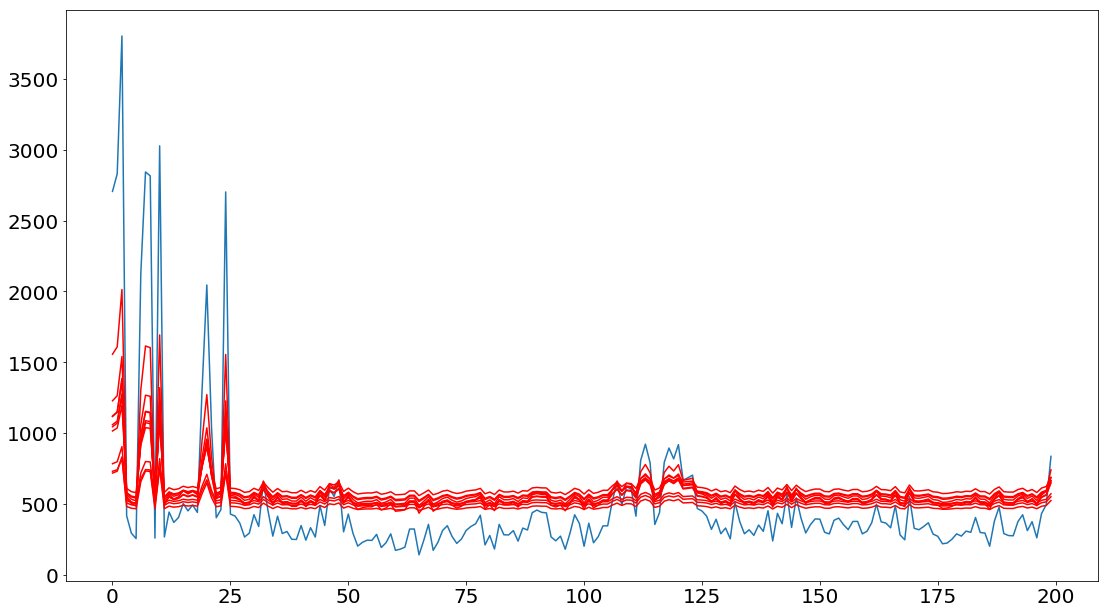

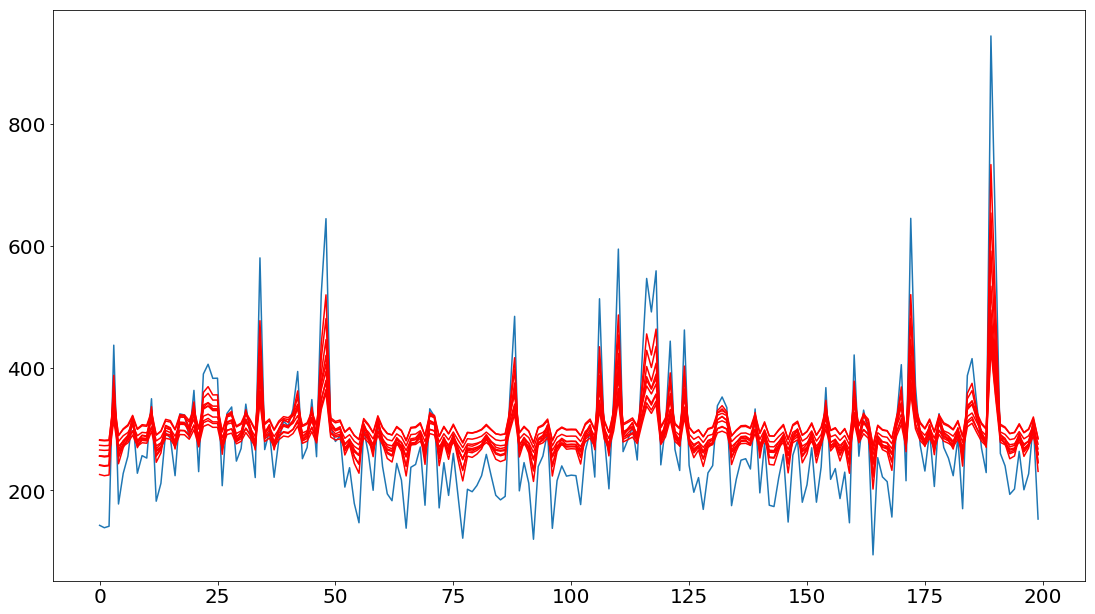

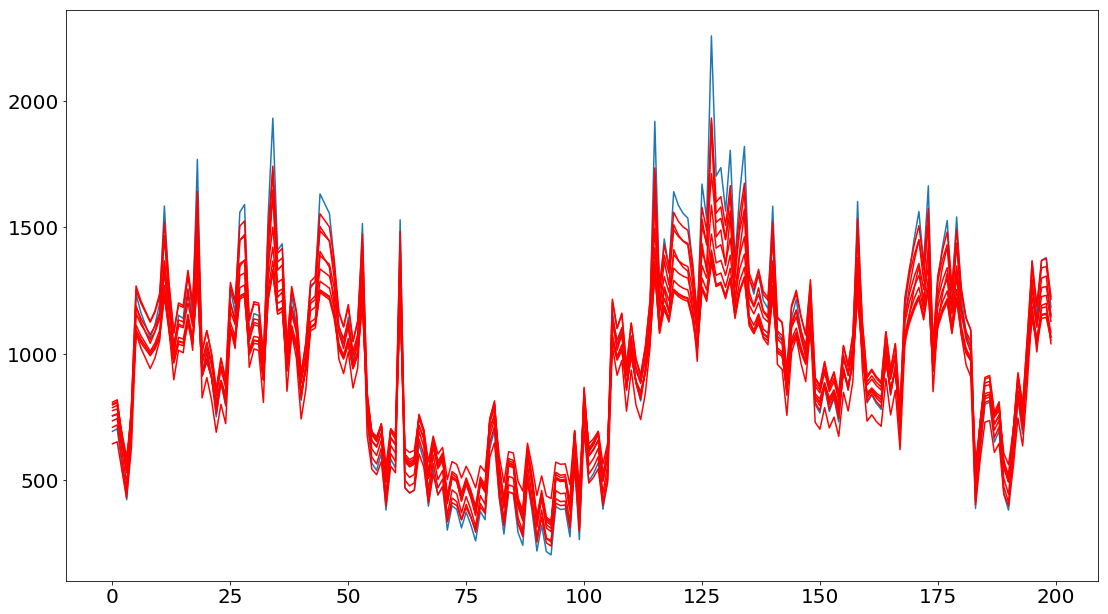

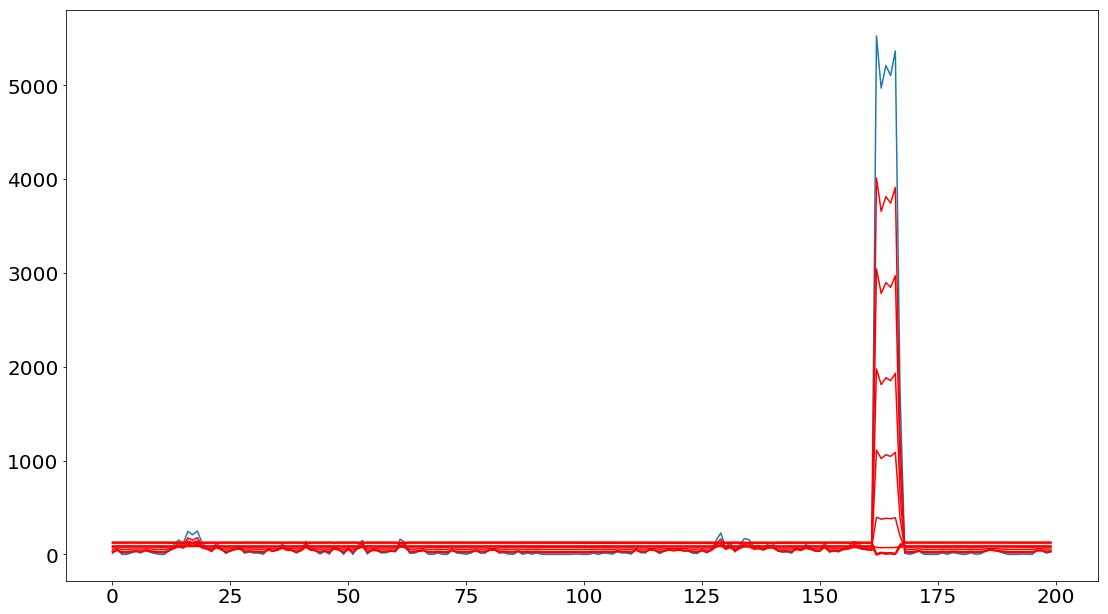

In [9]:
for x in range(0,5):
    fig, ax1 = plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax1.tick_params(labelsize=label_size)
    plt.plot(subsets_testing[x].values)
    plt.plot(pandas.DataFrame(LSTMpredictions[x]), color = 'red')
    #counter = 1
    #for elem in LSTMpredictions[x]:
    #    plt.plot(range(counter,counter+4), elem, color = 'red')
    #    counter += 1
    plt.savefig('..\..\Documents\Thesis\Pictures\RangePrediction\LSTM_Range_{0}.pdf'.format(x))
    plt.savefig('..\..\Documents\Thesis\Pictures\RangePrediction\LSTM_Range_{0}.svg'.format(x))
    plt.show()